In [32]:
import pickle
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

In [40]:
# 송어 (길이, 무게) 파일
f = open("실습 파일/perch.dat", "rb") # 읽기 위해 연 것,,, 읽은 거 아님!
perch = pickle.load(f) # 읽는 것
f.close()

perch

[array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
        21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
        23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
        27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
        39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
        44. ]),
 array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
          85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
         130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
         225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
         265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
         685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
         900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])]

In [41]:
X, y = perch #X길이 y무게

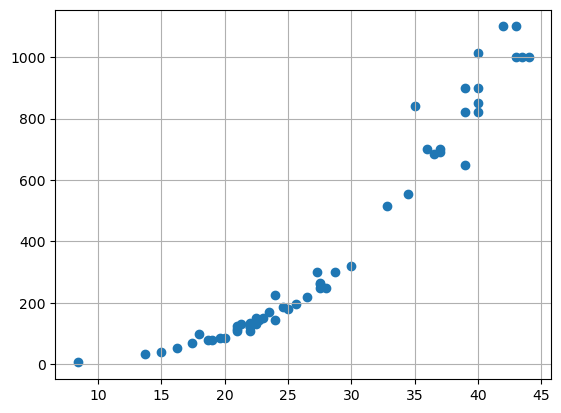

In [42]:
plt.scatter(X,y)
plt.grid()
plt.show()

### KNN 최근접 이웃 회귀모델
분류와의 차이는 : 다수결(분류)이냐 평균(회귀)을 내냐의 차이

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [47]:
# 문제집 2차원, 정답지 1차원
# X바꿔줘야함!
X.shape, y.shape

((56,), (56,))

In [51]:
X.reshape(56,1).shape
# 혹은 X.reshape(-1,1) # -1은 자동으로 변경

(56, 1)

In [60]:
data = X.reshape(-1,1)

train_x, test_x, train_y, test_y = train_test_split(data,y)

model = KNeighborsRegressor()
model.fit(train_x, train_y)
model.score(test_x, test_y) # R^2 (실제값의 분산/예측값의 분산)

# 실제값과 얼마나 가깝냐이기에, 비교 분석

0.9333999018853499

In [61]:
# 예측값
pred = model.predict(test_x)
pred

array([ 166.6,  132. ,  759. ,  227.2,  132. ,  166.6,  263.6,  891. ,
        132. ,  891. , 1043. ,   83.6,  263.6,  620.2])

In [62]:
# 실제값
test_y

array([ 145.,  120.,  700.,  197.,  130.,  225.,  265.,  850.,  130.,
        650., 1000.,   80.,  260.,  514.])

In [73]:
# 길이 특성 하나라 표준화 안했음! 할필요없는듯?
model.predict([[30]])

array([284.])

In [77]:
# 값을 가져와도 평균을 출력하는 거라서, 
#  단점 : 범위를 벗어나는 값은 예측하지 못함
model.predict([[45]]), model.predict([[50]]), model.predict([[450]])

(array([1043.]), array([1043.]), array([1043.]))

In [65]:
# 값들의 오차
abs(pred-test_y)

# 평균 절대 오차
# 내 모델이 평균적으로 44.6정도 틀릴 수 있음을 파악 가능
np.mean(abs(pred-test_y))

44.642857142857146

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
# 평균 절대 오차
# 이상치에 제곱 오차보다 덜 민감
# 해석에 용이
mean_absolute_error(test_y, pred)

44.642857142857146

In [71]:
# 평균 제곱 오차
# 이상치에 예민한 지표, 이상치에 큰 페널티를 부과할 때 사용
mean_squared_error(test_y,pred)

5809.9628571428575

In [72]:
# RMSE 평균 제곱오차에 루트 씌운것
# 이상치에 페널티 부과하고 싶을 때 사용
mean_squared_error(test_y, pred)**(1/2)

76.22311235539296

### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_x, train_y)
lr.score(test_x, test_y)

0.9192420082303336

In [81]:
lr.coef_ # 길이의 가중치

array([37.04929373])

In [82]:
lr.intercept_

-634.672361576309

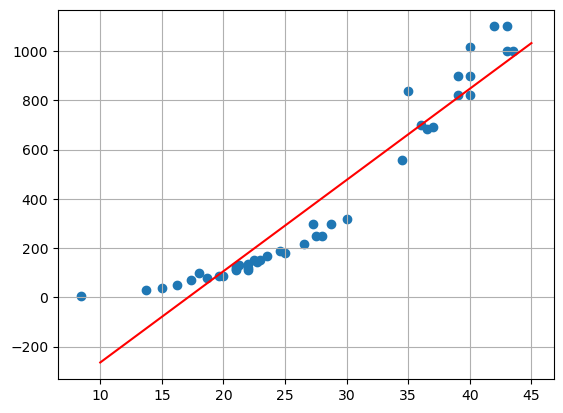

In [84]:
plt.scatter(train_x,train_y)

pred_x = np.arange(10,46) # 생선 길이
pred = lr.coef_*pred_x + lr.intercept_

plt.plot(pred_x, pred, c = 'r')

plt.grid()
plt.show()

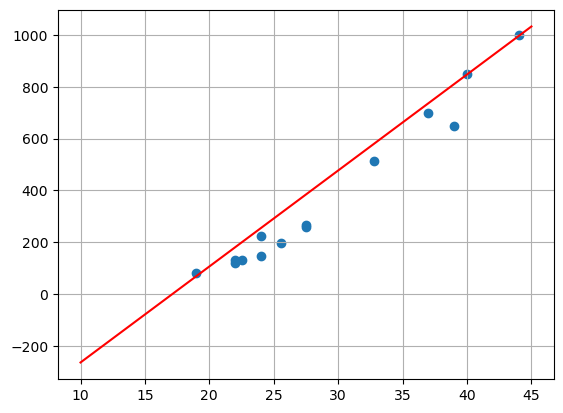

In [85]:
plt.scatter(test_x,test_y)

pred_x = np.arange(10,46) # 생선 길이
pred = lr.coef_*pred_x + lr.intercept_

plt.plot(pred_x, pred, c = 'r')

plt.grid()
plt.show()

In [86]:
X, y = perch

X

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

#### 성능 높이기

In [90]:
df = pd.DataFrame()
df['길이'] =X

# 좋은 방법은 아니지만, 넣어줌으로써 성능을 높이는 방법이 될 수도 있음
# 그냥 *2 / *3 은 아무런 효과가 없음
df['길이2'] = X**2 
df['무게'] = y

X = df.iloc[:,:-1].to_numpy()
y = df['무게'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X,y)

lr = LinearRegression()
lr.fit(train_x, train_y)
lr.score(test_x, test_y)

0.9376164019470494

In [91]:
lr.coef_

array([-25.83497081,   1.07260838])

In [92]:
lr.intercept_

174.30138369529539

In [96]:
# 가중치 넣기
# 기존의 데이터 기반으로 대략적으로 맞춰서 10, 46
pred = np.arange(10, 46) * lr.coef_[0]+(np.arange(10, 46)**2)*lr.coef_[1]+lr.intercept_

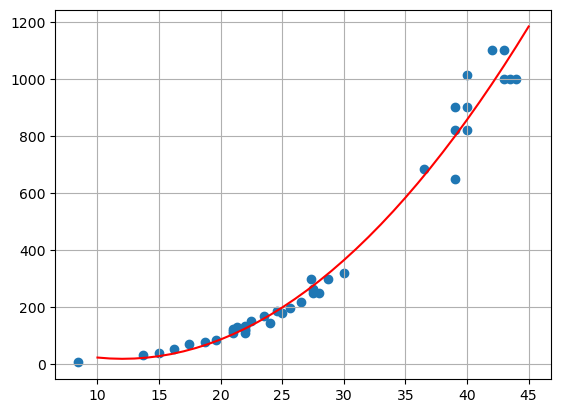

In [97]:
plt.scatter(train_x[:,0], train_y)

pred_x = np.arange(10,46)

plt.plot(pred_x, pred, c = 'red')

plt.grid()
plt.show()

In [151]:
# perch2.csv 학습 -> 모델 성능 높이기
# 정답지는 perch의 y

## test가 train 보다 성능이 더 좋게 나온다면?
# 잘못된 모델은 아님 그럴 수 있음! 단지 이 둘의 차이를 확인하는 것

from sklearn.preprocessing import StandardScaler

X = pd.read_csv('실습 파일/perch2.csv').to_numpy()

_, y = perch

train_x, test_x, train_y, test_y = train_test_split(X,y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

lr = LinearRegression()
lr.fit(train_scaled, train_y)

print(lr.score(train_scaled, train_y),lr.score(test_scaled, test_y))

0.954247201388968 0.8731029995734292


In [135]:
print(lr.coef_, lr.intercept_)

[ 49.87068575 202.15192937  77.89130766] 372.17857142857133


In [132]:
# 내가 연습
df2 = pd.read_csv('실습 파일/perch2.csv')
df2['length2'] = df2['length']**2
df2['height2'] = df2[' height']**2
df2['width2'] = df2[' width']**2
df2['target'] = y

X = df2.iloc[:,:-1].to_numpy()
y = df2['target'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X,y)

lr = LinearRegression()
lr.fit(train_x, train_y)
lr.score(test_x, test_y)

0.9908109724498854

In [146]:
# 강사님과 연습

from sklearn.preprocessing import PolynomialFeatures # 특성공학

# include_bias = False : 1이라는 특성 추가 안함! 크게 도움 안됨
# 3개의 특성을 가지고 degree : 2 (제곱까지 허용)
# degree=4 이면 4제곱까지 허용
# 하지만 높으면 과적합이 될 가능성이 높아서, 최대 2로해서 사용하는 걸 추천
# x1, x2, x3, x1^2, x2^2, x3^2, x1x2, x2x3, x1x3

poly = PolynomialFeatures(degree=2, include_bias=False)

X = pd.read_csv('실습 파일/perch2.csv').to_numpy()

_, y = perch

train_x, test_x, train_y, test_y = train_test_split(X,y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)
print("train_scaled 의 shape : ",train_scaled.shape )

train_poly = poly.fit_transform(train_scaled)
test_poly = poly.transform(test_scaled)

print("train_poly 의 shape : ",train_poly.shape )

lr = LinearRegression()
lr.fit(train_poly, train_y)

print(lr.score(train_poly, train_y),lr.score(test_poly, test_y))

train_scaled 의 shape :  (42, 3)
train_poly 의 shape :  (42, 9)
0.9929719092013043 0.9393892478251921


In [148]:
# 과대적합 극복방법

poly = PolynomialFeatures(degree=3, include_bias=False)

X = pd.read_csv('실습 파일/perch2.csv').to_numpy()

_, y = perch

train_x, test_x, train_y, test_y = train_test_split(X,y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)
print("train_scaled 의 shape : ",train_scaled.shape )

train_poly = poly.fit_transform(train_scaled)
test_poly = poly.transform(test_scaled)

print("train_poly 의 shape : ",train_poly.shape )

lr = LinearRegression()
lr.fit(train_poly, train_y)

print(lr.score(train_poly, train_y),lr.score(test_poly, test_y))

train_scaled 의 shape :  (42, 3)
train_poly 의 shape :  (42, 19)
0.9976377649348972 -1.0722090259458987


### 릿지 모델
y = a1x1 + a2x2 + b + 알파*시그마(ai**2)
- 시그마(ai**2) : 가중치의 제곱을 더한 값             

from sklearn.linear_model import Ridge

선형회귀보다 과대적합에 자유로움

선형방적식 뒤에 가중치의 제곱을 더한 값임.

### 라쏘 모델
선형방정식 뒤에 가중치의 절댓값을 더한 값임              
from sklearn.linear_model import Lasso

### 엘라스틱넷 모델
릿지와 라쏘의 적절한 조합                
from sklearn.linear_model import ElasticNet

In [149]:
# 과대적합 극복방법 : 릿지회귀

from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=3, include_bias=False)

X = pd.read_csv('실습 파일/perch2.csv').to_numpy()
_, y = perch

train_x, test_x, train_y, test_y = train_test_split(X,y)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)
print("train_scaled 의 shape : ",train_scaled.shape )

train_poly = poly.fit_transform(train_scaled)
test_poly = poly.transform(test_scaled)

print("train_poly 의 shape : ",train_poly.shape )

lr = Ridge(alpha = 0.1) # alpha 가 0이면 선형회귀랑 같고, 알파가 너무 크면 정확한 계수 찾기가 힘듦 
lr.fit(train_poly, train_y)

print(lr.score(train_poly, train_y),lr.score(test_poly, test_y))

train_scaled 의 shape :  (42, 3)
train_poly 의 shape :  (42, 19)
0.9926689566803413 0.9622191230648764


In [156]:
# 특성 선택
from sklearn.feature_selection import SelectKBest, f_classif

X = pd.read_csv('실습 파일/perch2.csv')
_, y = perch

# 특성 선택 : 분산 분석 클래스에 가장 영향을 미치는 특성 선택
# 가장 관련있는 영향을 주는 2개만 가져오겠다. k=2
selector = SelectKBest(f_classif, k=2)

X_new = selector.fit_transform(X,y)

selector.get_feature_names_out()

array(['length', ' height'], dtype=object)